
@author: Octavio Gutiérrez de Código Máquina

URL del canal: https://www.youtube.com/CodigoMaquina

URL del video: https://youtu.be/FNWbigoQNOk

<h2 style="color:purple">Regresión lineal con Gradiente Descendiente</h2>

Intersección con eje Y (b): 0.00
Pendiente (m): 2.10
Suma de cuadrados de los residuos (RSS): 31.42


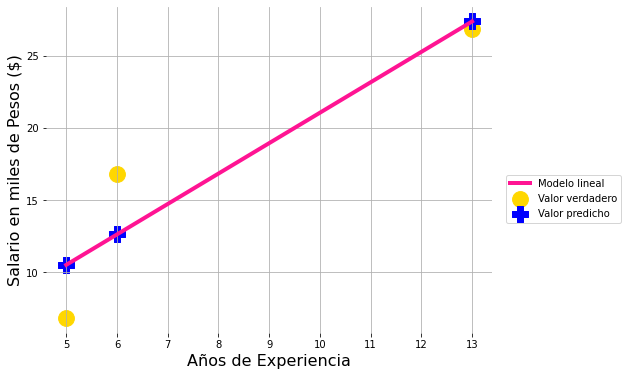

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from sklearn.linear_model import LinearRegression

# Variable independiente
experiencia = np.array([[5], [6], [13]]) 

# Variable objetivo
salario = np.array([6.85, 16.83, 26.84])

# Modelo lineal creado con el método de mínimos cuadrados
modelo = LinearRegression().fit(experiencia.reshape(3, -1),
                                salario)

# Visualización de datos y modelo
print("Intersección con eje Y (b): %0.2f" % modelo.intercept_)
print("Pendiente (m): %0.2f" % modelo.coef_[0])
print("Suma de cuadrados de los residuos (RSS): %0.2f" %
      ((salario - modelo.predict(experiencia))**2).sum())

plt.figure(figsize=(8, 6))

plt.scatter(experiencia, salario, color="gold", s=250,
            marker="o", label="Valor verdadero")

plt.scatter(experiencia, modelo.predict(experiencia),
            color="blue", s=250, marker="P", label="Valor predicho") 

plt.plot(experiencia, modelo.predict(experiencia),
         linewidth=4, color="deeppink", label="Modelo lineal") 

experiencia = experiencia.reshape(3)

plt.ylabel("Salario en miles de Pesos ($)", size=16)
plt.xlabel("Años de Experiencia", size=16)
plt.legend(bbox_to_anchor=(1.3, 0.5))
plt.grid()
plt.box(False)
plt.show()

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
<h2 style="color:purple">Diferentes Modelos con diferentes Pendientes</h2>

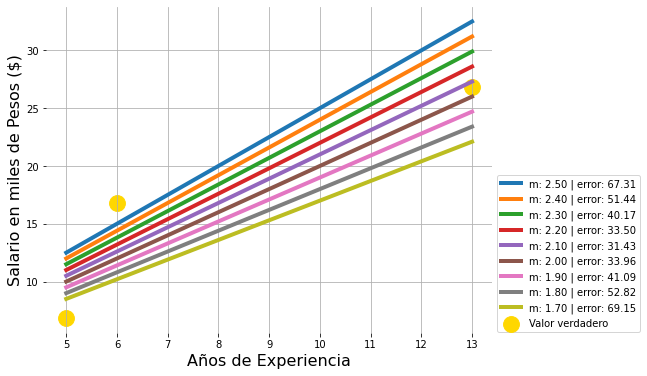

In [2]:
# Creación de múltiples pendientes para exploración
pendientes = np.arange(2.5, 1.6, -0.1)

# Vector para almacenar el error de los diferentes modelos
errores = np.array([])

# Visualización de modelos

plt.figure(figsize=(8, 6))

for pendiente in pendientes: 
    # Error del modelo (suma de cuadrados de los residuos)
    error = ((pendiente*experiencia - salario)**2).sum()

    # Visualización de un modelo para una pendiente dada
    plt.plot(experiencia, pendiente*experiencia, linewidth=4, 
             label="m: %0.2f | error: %0.2f" %
            (pendiente, error)) 
    
    errores = np.append(errores, error)

plt.scatter(experiencia, salario, color="gold", s=250,
            marker="o", label="Valor verdadero")

plt.ylabel("Salario en miles de Pesos ($)", size=16)
plt.xlabel("Años de Experiencia", size=16)
plt.legend(bbox_to_anchor=(1, 0.5))
plt.grid()
plt.box(False)
plt.show()

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
<h2 style="color:purple">Visualización de los Errores (RSS)</h2>

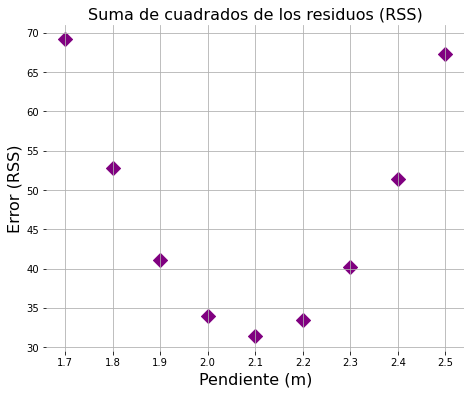

In [3]:
plt.figure(figsize=(7.5, 6))
plt.title("Suma de cuadrados de los residuos (RSS)", size=16)
plt.ylabel("Error (RSS)", size=16)
plt.xlabel("Pendiente (m)", size=16)
plt.scatter(pendientes, errores, color="purple", marker="D", s=99) 
plt.grid()
plt.box(False)
plt.show()

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
<h2 style="color:purple">Función de Error a ser Minimizada</h2>
<h3 style="color:purple">Suma de los cuadrados de los residuos (RSS)</h3>

$$\text{RSS}(y, \hat{y}) = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

$$ y_i = \text{salario}_i $$

$$ \hat{y}_i = m\cdot\text{experiencia}_i $$


Donde $y$ son los valores verdaderos, $\hat{y}$ son los valores predichos y $n$ es el tamaño de la muestra.


In [4]:
# persona1: (6.85, 5) persona2: (16.83, 6) persona3: (26.84, 13)

m = sym.Symbol("m")

# Función de error
error = (6.85 - m*5)**2 + (16.83 - m*6)**2 + (26.84 - m*13)**2

# Derivada de la función de error
derivada = sym.diff(error, m)

for pendiente in pendientes:
    print(derivada, "Evaluación %0.2f" % derivada.evalf(subs={m: pendiente}))


460.0*m - 968.3 Evaluación 181.70
460.0*m - 968.3 Evaluación 135.70
460.0*m - 968.3 Evaluación 89.70
460.0*m - 968.3 Evaluación 43.70
460.0*m - 968.3 Evaluación -2.30
460.0*m - 968.3 Evaluación -48.30
460.0*m - 968.3 Evaluación -94.30
460.0*m - 968.3 Evaluación -140.30
460.0*m - 968.3 Evaluación -186.30


<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
<h2 style="color:purple">Visualizando - Derivada de la función de Error</h2>

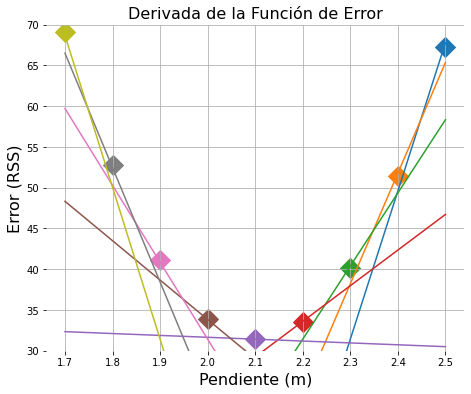

In [5]:
plt.figure(figsize=(7.5, 6))

for i in range(0, len(errores), 1):
    # Error de un modelo dado
    plt.scatter(pendientes[i], errores[i], 
                label="%0.2f" % derivada.evalf(subs={m: pendientes[i]}),
                marker="D", s=200) 
    
    # Evaluación de la derivada para un error dado
    pendiente = derivada.evalf(subs={m: pendientes[i]})
    
    plt.plot(np.array([1.7, 2.5]), 
             np.array([1.7, 2.5])*pendiente + 
             pendiente*(-2.3 + i*0.05) + errores.min())

plt.title("Derivada de la Función de Error", size=16)
plt.ylabel("Error (RSS)", size=16)
plt.xlabel("Pendiente (m)", size=16)
plt.ylim(30, 70)
plt.grid()
plt.box(False)
plt.show()

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
<h2 style="color:purple">Generalizando para 2 o más parámetros: m y b</h2>

Intersección con eje Y (b): -4.38
Pendiente (m): 2.45
Suma de cuadrados de los residuos (RSS): 4.03


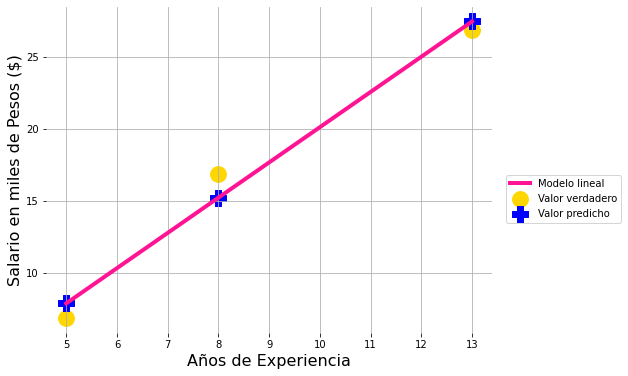

In [6]:
# Datos casi iguales, pero con un cambio en la experiencia 

# Variable independiente
experiencia = np.array([[5], [8], [13]]) 

# Variable objetivo
salario = np.array([6.85, 16.83, 26.84])

# Modelo lineal creado con el método de mínimos cuadrados
modelo = LinearRegression().fit(experiencia.reshape(3, -1),
                                salario)

# Visualización de datos y modelo
print("Intersección con eje Y (b): %0.2f" % modelo.intercept_)
print("Pendiente (m): %0.2f" % modelo.coef_[0])
print("Suma de cuadrados de los residuos (RSS): %0.2f" %
      ((salario - modelo.predict(experiencia))**2).sum())

plt.figure(figsize=(8, 6))

plt.scatter(experiencia, salario, color="gold", s=250,
            marker="o", label="Valor verdadero")

plt.scatter(experiencia, modelo.predict(experiencia),
            color="blue", s=250, marker="P", label="Valor predicho") 

plt.plot(experiencia, modelo.predict(experiencia),
         linewidth=4, color="deeppink", label="Modelo lineal") 

plt.ylabel("Salario en miles de Pesos ($)", size=16)
plt.xlabel("Años de Experiencia", size=16)
plt.legend(bbox_to_anchor=(1.3, 0.5))
plt.grid()
plt.box(False)
plt.show()

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
<h3 style="color:purple">Función de Error (m, b)</h3>

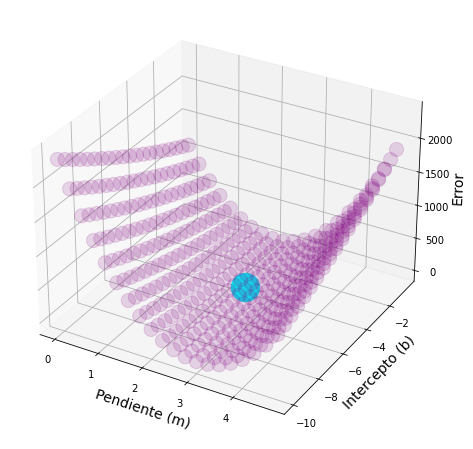

In [7]:
def error_RSS(m, b):
    return (6.85 - (m*5 + b))**2 + (16.83 - (m*8 + b))**2 + (26.84 - (m*13 + b))**2

# Generación de rejilla (pendientes, interceptos, errores)

puntos = np.zeros(shape=(400,3))
i = 0
for pendiente in np.arange(0, 5, 0.25):
    for intercepto in np.arange(-10, 0, 0.50):
        puntos[i][0] = pendiente
        puntos[i][1] = intercepto
        puntos[i][2] = error_RSS(pendiente, intercepto)
        i += 1

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection="3d")

# Mínimo global
ax.scatter(2.45, -4.38, 4.03,
           marker="o", c="cyan", s=800)

# Todos los otros puntos
ax.scatter(puntos.T[0], puntos.T[1], puntos.T[2],
           marker="o", c="purple", s=200, alpha=0.15)

ax.set_xlabel('Pendiente (m)', size=14)
ax.set_ylabel('Intercepto (b)', size=14)
ax.set_zlabel('Error', size=14)
#ax.view_init(0, -30)
plt.show()

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
<h3 style="color:purple">Derivadas parciales de la Función de Error</h3>

In [8]:
m, b = sym.symbols("m b")

error = (6.85 - (m*5 + b))**2 + (16.83 - (m*8 + b))**2 + (26.84 - (m*13 + b))**2

derivada_error_m = sym.diff(error, m)

derivada_error_b = sym.diff(error, b)

print(derivada_error_m)

print(derivada_error_b)

52.0*b + 516.0*m - 1035.62
6.0*b + 52.0*m - 101.04


<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
<h2 style="color:purple">Pseudocódigo del Gradiente Descendiente</h2>

<span style="color:red">1.</span> iteraciones máximas = 10000 <br>
<span style="color:red">2.</span> iteración = 0 <br>
<span style="color:red">3.</span> tasa de aprendizaje = 0.001 <br>
<span style="color:red">4.</span> inicialización aleatoria de parámetros <br>
<span style="color:red">5.</span> mientras (iteración < iteraciones máximas) hacer: <br>
<span style="color:red">6.</span> &nbsp;&nbsp;&nbsp;&nbsp; calcular gradientes en la posición actual <br>
<span style="color:red">7.</span> &nbsp;&nbsp;&nbsp;&nbsp; actualizar parámetros en función de los gradientes y la tasa de aprendizaje<br>
<span style="color:red">8.</span> &nbsp;&nbsp;&nbsp;&nbsp; iteración += 1 <br>
<img src="imagenes/error_mb.png" align="left" width="250" height="300">
    
    

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
<h2 style="color:purple">Implementación del Gradiente Descendiente</h2>

In [9]:
interaciones_max = 10000
tasa_de_aprendizaje = 0.001

# Inicialización aleatoria de pendiente y intercepto 
pendiente = 0
intercepto = -10

errores = np.zeros(shape=(10000, 3))

for i in range(interaciones_max):
    # Cálculo de los gradientes
    gradientes = [derivada_error_m.evalf(subs={m : pendiente,
                                               b : intercepto}),
                  derivada_error_b.evalf(subs={m : pendiente,
                                               b : intercepto})]
    
    # Actualización de parámetros 
    pendiente = pendiente - tasa_de_aprendizaje*gradientes[0]
    intercepto = intercepto - tasa_de_aprendizaje*gradientes[1]
    
    # Registro de los errores
    errores[i][0] = pendiente
    errores[i][1] = intercepto
    errores[i][2] = error_RSS(pendiente, intercepto)
    
    
# Valores calculados vía el Método de Mínimos Cuadrados de sklearn
# Pendiente (m): 2.44898163
# Intercepto (b): -4.382390816326527
    
print("Derivada pendiente (m) =", gradientes[0])
print("Derivada intercepto (b) =", gradientes[1])
print("m =", pendiente, "b =", intercepto)


Derivada pendiente (m) = 0.000218445852030267
Derivada intercepto (b) = -0.00216449575579388
m = 2.44835147659091 b = -4.37940660844884


<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
<h2 style="color:purple">Visualización del Descenso del Error</h2>

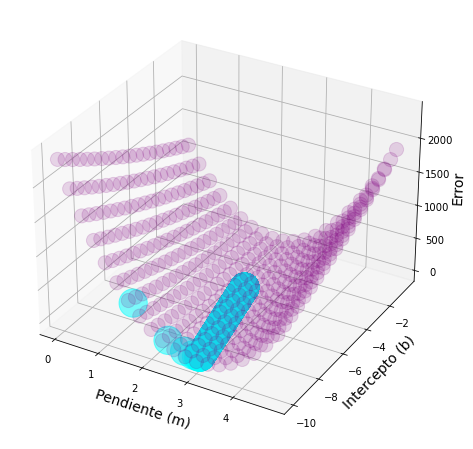

In [10]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection="3d")

# Camino decreciente de errores
ax.scatter(errores.T[0], errores.T[1], errores.T[2],
           marker="o", c="cyan", s=800, alpha=0.5)

# Todos los otros puntos
ax.scatter(puntos.T[0], puntos.T[1], puntos.T[2],
           marker="o", c="purple", s=200, alpha=0.15)

ax.set_xlabel('Pendiente (m)', size=14)
ax.set_ylabel('Intercepto (b)', size=14)
ax.set_zlabel('Error', size=14)
plt.show()